In [3]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 78.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 33.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [5]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")


('ratings.txt', <http.client.HTTPMessage at 0x7b04be450cd0>)

In [6]:
train_data = pd.read_table('ratings.txt')

In [7]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [8]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [9]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [10]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [11]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)

In [12]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']



In [16]:
import tqdm

In [20]:
okt = Okt()

In [22]:
tokenized_data = []
for sentence in tqdm.tqdm(train_data['document']):
    sentence = str(sentence)
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [11:20<00:00, 293.93it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


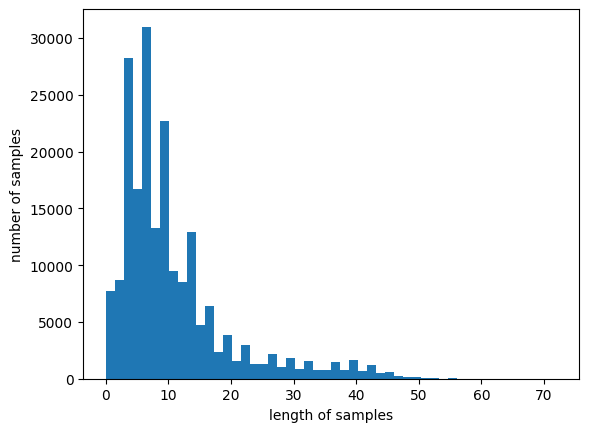

In [23]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)


In [25]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape


(16477, 100)

In [26]:
print(model.wv.most_similar("최민식"))


[('한석규', 0.8470507264137268), ('안성기', 0.8343302607536316), ('이민호', 0.8187289834022522), ('이정재', 0.8145421147346497), ('박중훈', 0.8137033581733704), ('오달수', 0.8121950626373291), ('최민수', 0.8104577660560608), ('주진모', 0.8088425397872925), ('유다인', 0.8086503148078918), ('김명민', 0.8039681911468506)]


In [27]:
print(model.wv.most_similar("히어로"))


[('슬래셔', 0.8612152934074402), ('무협', 0.8577626347541809), ('느와르', 0.8553493618965149), ('호러', 0.8502833247184753), ('정통', 0.8266759514808655), ('물의', 0.8230214715003967), ('물', 0.8153651356697083), ('무비', 0.8076170682907104), ('블록버스터', 0.8053439259529114), ('하이', 0.793070912361145)]


In [28]:
model.wv.save_word2vec_format('ko_w2v') # 모델 저장

In [29]:
!python -m gensim.scripts.word2vec2tensor --input ko_w2v --output ko_w2v

In [30]:
import FileLink
FileLink("ko_w2v_metadata.tsv")

ModuleNotFoundError: No module named 'FileLink'